<a href="https://colab.research.google.com/github/reygaferdiansyah/MLP-XGB-Ridge-Cat-Models/blob/main/House_Prediction_MLP_XGB_Ridge_Cat_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, f_regression, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# read files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
# make a copy from datas
train_prep = train_data.copy()
test_prep = test_data.copy()

In [ ]:
# checking for Nan values
train_prep.info()
test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# describe the table
train_prep.describe()
test_prep.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# dealing with Nan datas for train
list_none=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure' ,'BsmtFinType1', 'BsmtFinType2' ,'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual' ,'GarageCond', 'PoolQC' ,'Fence','MiscFeature']
train_prep[list_none] = train_prep[list_none].fillna('None')
train_prep['LotFrontage'] = train_prep['LotFrontage'].fillna(np.round_(np.mean(train_prep['LotFrontage'])))
train_prep['GarageYrBlt'] = train_prep['GarageYrBlt'].fillna(-1)
list_Mas = ['MasVnrType','MasVnrArea','Electrical']
train_prep[list_Mas] = train_prep[list_Mas].fillna(train_prep.mode().iloc[0])

In [ ]:
# dealing with Nan datas
list_none_test=['Alley','BsmtQual', 'BsmtCond','MSZoning' ,'BsmtExposure' ,'BsmtFinType1', 'BsmtFinType2' ,'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual' ,'GarageCond', 'PoolQC' ,'Fence','MiscFeature']
test_prep[list_none_test] = test_prep[list_none_test].fillna('None')
test_prep['LotFrontage'] = test_prep['LotFrontage'].fillna(np.round_(np.mean(test_prep['LotFrontage'])))
test_prep['GarageYrBlt'] = test_prep['GarageYrBlt'].fillna(-1)
list_Mas = ['MasVnrType','MasVnrArea','Electrical','Utilities','Exterior1st','Exterior2nd','BsmtHalfBath','BsmtFullBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']
test_prep[list_Mas] = test_prep[list_Mas].fillna(test_prep.mode().iloc[0])
list_0 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
test_prep[list_0] = test_prep[list_0].fillna(0)

In [ ]:
# remove Id feature
train_prep.drop(['Id'], axis=1, inplace=True)
test_prep.drop(['Id'], axis=1, inplace=True)

In [ ]:
# dealing with outliers
Q1= train_prep['SalePrice'].quantile(0.99)
Q3= train_prep['SalePrice'].quantile(0.05)
train_prep = train_prep[(train_prep['SalePrice'] <= Q1) & (train_prep['SalePrice'] >= Q3)]

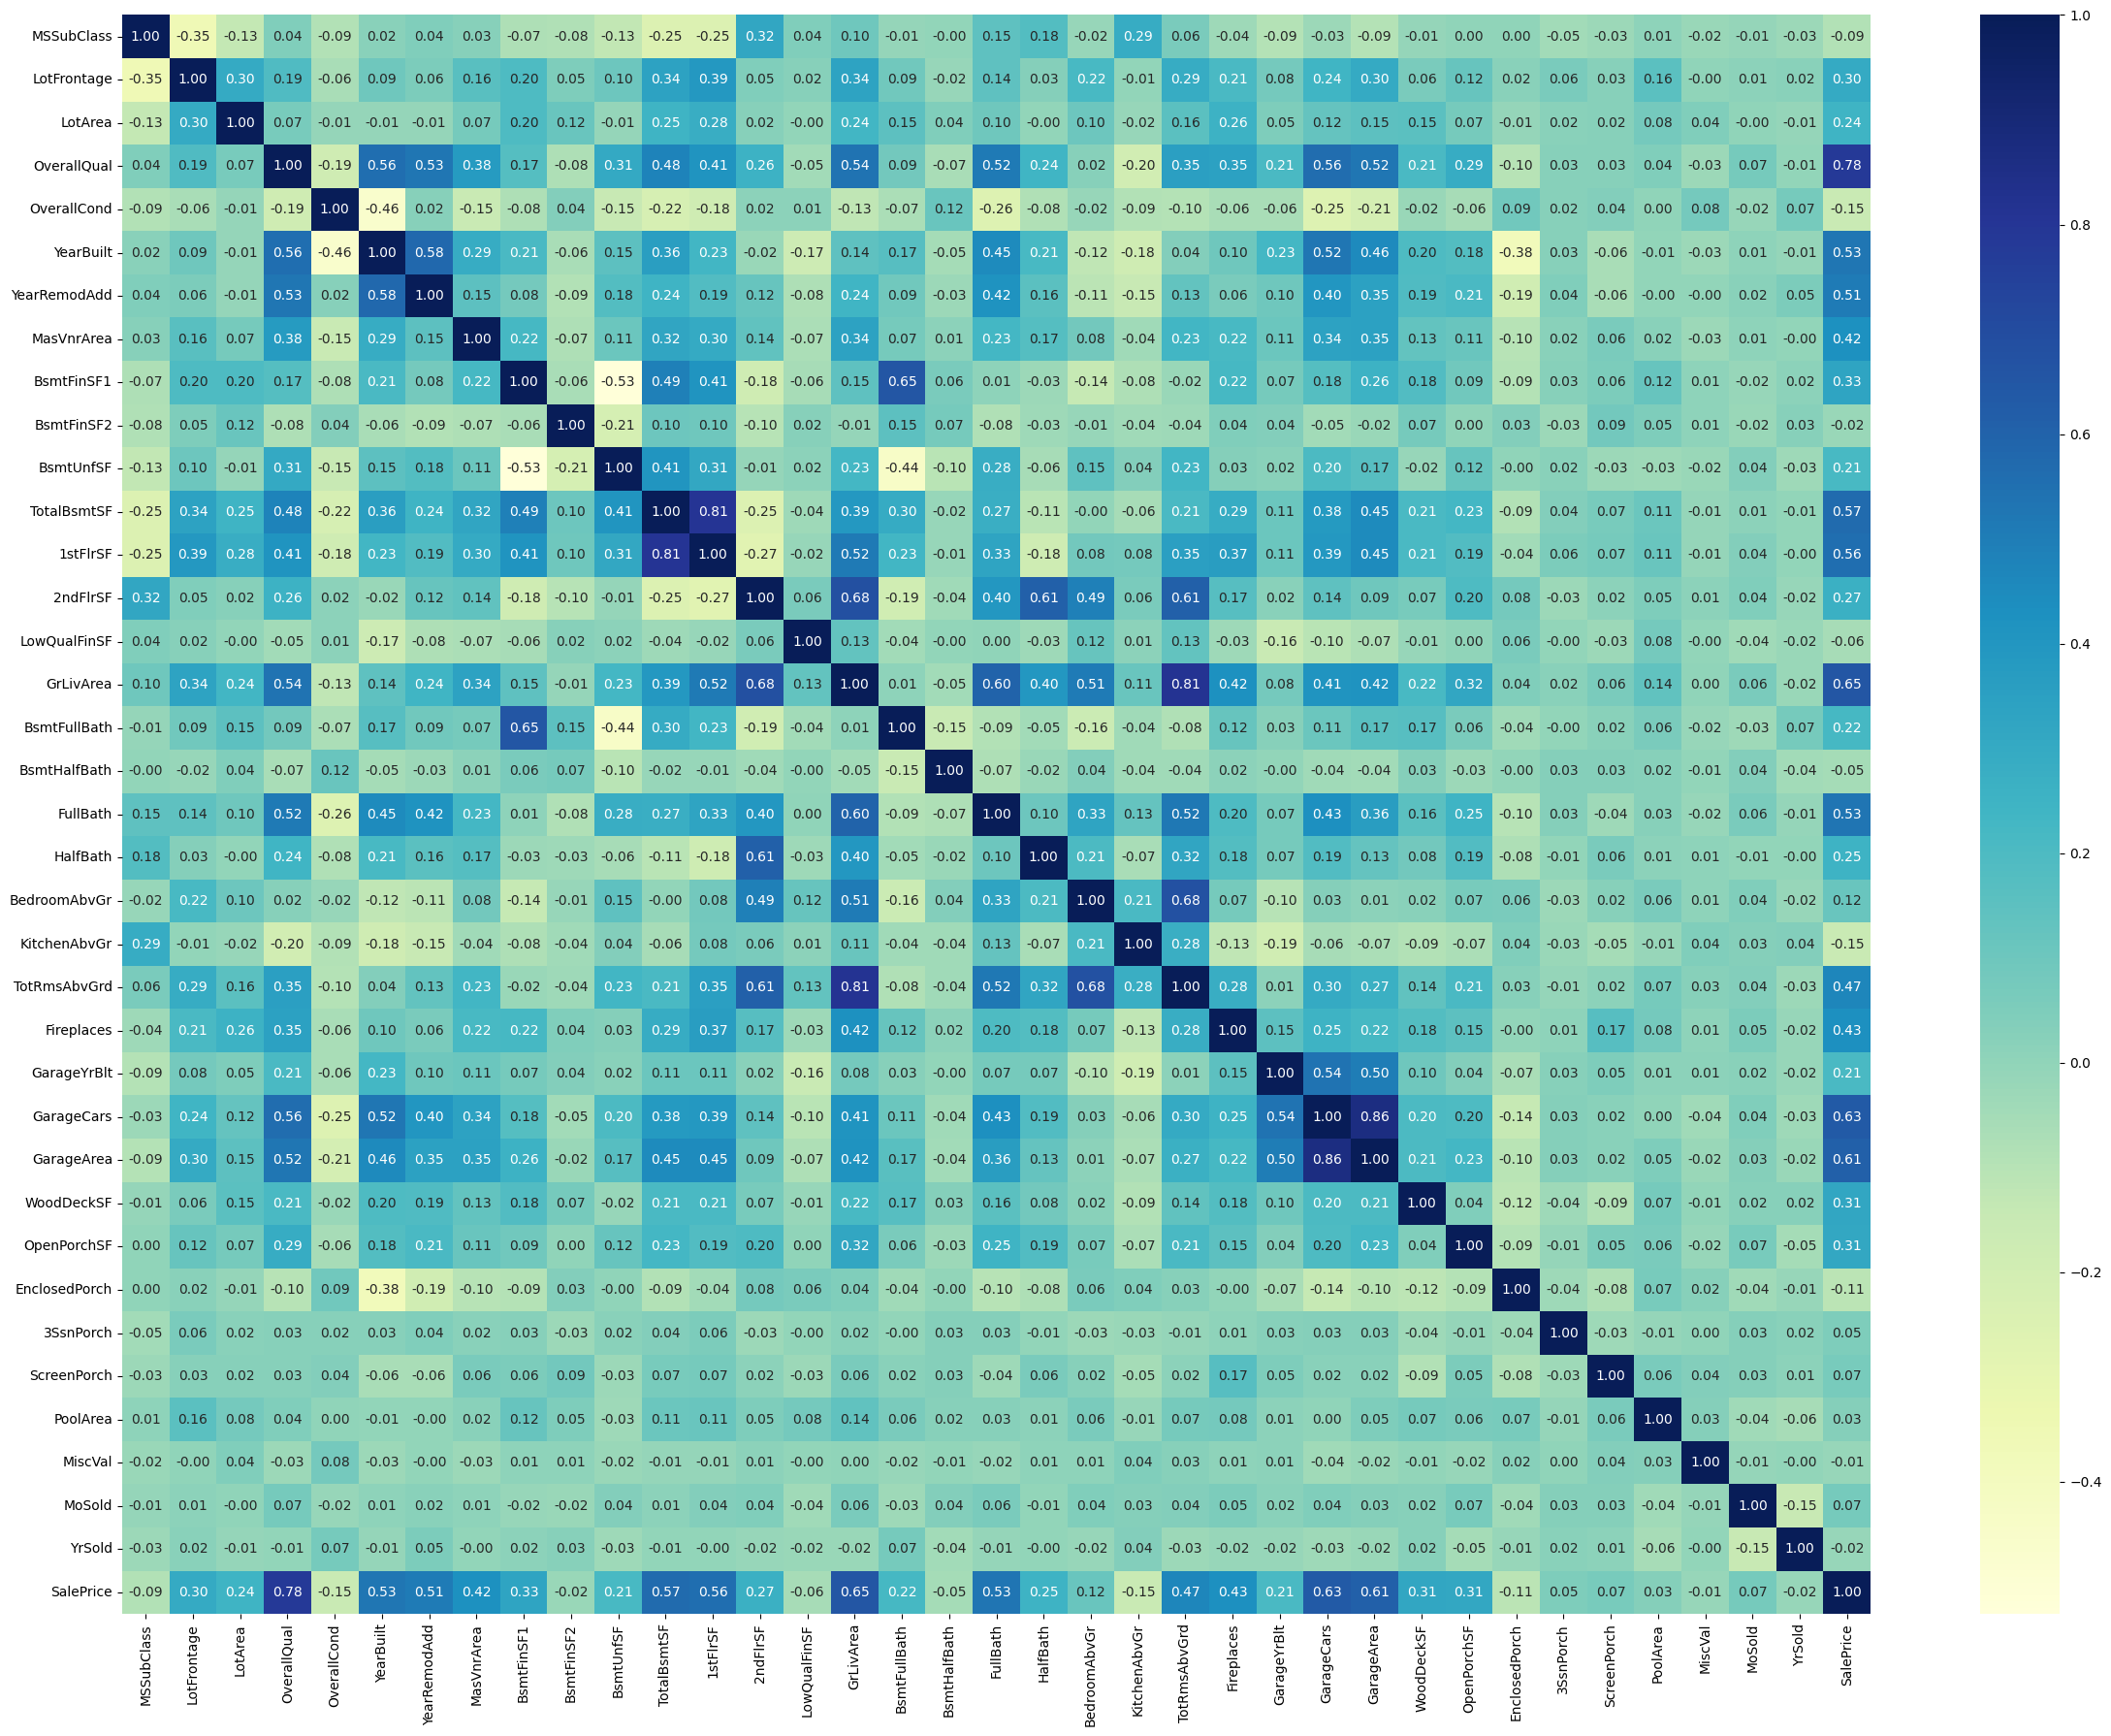

In [ ]:
# Heatmap corr numerical features
corr = train_prep.select_dtypes('number').corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr , fmt = '0.2f', cmap = 'YlGnBu', annot=True)
plt.tight_layout()
plt.show()

In [ ]:
# Remove low correlated numerical features
def remove_low_features(df, target, threshold):
    corr = df.select_dtypes('number').corr()[target]
    low_corr_features = corr[corr < threshold].index.tolist()
    df = df.drop(low_corr_features, axis=1)
    return df

train_prep = remove_low_features(train_prep, 'SalePrice', 0.2)

In [ ]:
# seperate the same features in test data
for feature in test_prep.keys():
    if feature not in train_prep.keys():
        test_prep = test_prep.drop(feature, axis=1)

In [ ]:
# make a dataframe of categorical features
train_cat = train_prep.select_dtypes('object')


def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_cat = oe.transform(X)
    return X_cat

train_cat_transform = prepare_inputs(train_cat)

In [ ]:
# select k best for categorical features
selector = SelectKBest(score_func=chi2, k=30)
selector.fit(train_cat_transform, train_prep['SalePrice'])
X_selected_categorical = selector.transform(train_cat_transform)

In [ ]:
# finding name of the selected features
col = selector.get_support(indices=True)
selected_cols = train_cat.columns[col].tolist()

In [ ]:
for feature in train_prep.select_dtypes('object').keys():
    if feature not in selected_cols:
        train_prep = train_prep.drop(feature, axis=1)

for feature in test_prep.select_dtypes('object').keys():
    if feature not in selected_cols:
        test_prep = test_prep.drop(feature, axis=1)

In [ ]:
# making X and Y
X = train_prep.drop(['SalePrice'], axis=1)
Y = train_prep['SalePrice']

In [ ]:
SS = StandardScaler()
cols = X.select_dtypes('number').keys()
X[cols] =  SS.fit_transform(X.select_dtypes('number'))
test_prep[cols] = SS.fit_transform(test_prep.select_dtypes('number'))

In [ ]:
X_final = pd.get_dummies(X,dtype=float, drop_first=True)
test_final = pd.get_dummies(test_prep, dtype=float, drop_first=True)

In [ ]:
for feature in X_final:
    if feature not in test_final.keys():
        X_final = X_final.drop(feature, axis=1)


for feature in test_final:
    if feature not in X_final.keys():
        test_final = test_final.drop(feature, axis=1)


test_final_unselect = test_final.copy()

In [ ]:
# feature selection
selector = GenericUnivariateSelect(score_func=f_regression, mode='percentile',param=70)

X_feature = selector.fit_transform(X_final, Y)
cols = selector.get_support(indices=True)
selected_cols = X_final.columns[cols].tolist()


for i in test_final:
    if i not in selected_cols:
        test_final.drop(i, axis=1, inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=1234)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_feature , Y, test_size=0.2, random_state=1234)

In [ ]:
# MLP model
ML = MLPRegressor(random_state=1234, max_iter=500, solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5,80))

ML.fit(X_feature, Y)
Y_pred_ML = ML.predict(X_test1)
Y_pred_test_ML = ML.predict(test_final)

r2_ML = r2_score(Y_test1, Y_pred_ML)
print(r2_ML)

0.9626786423519258


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Ridge
ridge = Ridge(alpha=1)

ridge.fit(X_train1, Y_train1)
Y_pred_ridge = ridge.predict(X_test1)
Y_pred_test_ridge = ridge.predict(test_final)

r2_ridge = r2_score(Y_test1, Y_pred_ridge)
print(r2_ridge)

0.871878019067695


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
# catboost
cat = CatBoostRegressor(learning_rate=0.3, max_depth=5, verbose=0, iterations=1000, random_state=1234)

cat.fit(X_train, Y_train)
Y_pred_cat = cat.predict(X_test)
Y_pred_test_cat = cat.predict(test_final_unselect)

r2_cat = r2_score(Y_test, Y_pred_cat)
print(r2_cat)

0.9007049274011585


In [ ]:
# Xgb
xgb = XGBRegressor(learning_rate=0.2, n_estimators=40, max_depth=5)

xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
Y_pred_test_xgb = xgb.predict(test_final_unselect)

r2_xgb = r2_score(Y_test, Y_pred_xgb)
print(r2_xgb)

0.8839239472898177
